In [1]:
#导入包(PyPI)
import pymongo
import pandas as pd
import re
import jieba
import os
from PIL import Image
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
#连接MongoDB
myclient=pymongo.MongoClient("mongodb://localhost:27017/")
mydb=myclient["Steam平台用户活跃数据"]#进行操作的库名
mycol=mydb["MostPlayedGamesTop100DetailedInformation"]#进行操作的集合名

In [3]:
data=[]
for doc in mycol.find():
    data.append(doc)
df=pd.DataFrame(data)
df.head()

,_id,ID,name(English),name(Chinese),tags,languages,top_players,developer,publisher,release_date
0,6456437a69698b838ca3da87,578080,PUBG: BATTLEGROUNDS,绝地求生,"Action, Adventure, Free to Play, Massively Mul...","English, Korean, Simplified Chinese, French, G...",3236027,"KRAFTON, Inc.","KRAFTON, Inc.","21 Dec, 2017"
1,6456437a69698b838ca3da88,730,Counter-Strike: Global Offensive,反恐精英：全球攻势,"Action, Free to Play","English, Czech, Danish, Dutch, Finnish, French...",1533939,"Valve', 'Hidden Path Entertainment",Valve,"21 Aug, 2012"
2,6456437a69698b838ca3da89,570,Dota 2,刀塔2,"Action, Free to Play, Strategy","English, Bulgarian, Czech, Danish, Dutch, Finn...",1291328,Valve,Valve,"9 Jul, 2013"
3,6456437a69698b838ca3da8a,1599340,Lost Ark,Lost Ark,"Action, Adventure, Free to Play, Massively Mul...","English, French, German, Spanish - Spain",1174722,Smilegate RPG,Amazon Games,"11 Feb, 2022"
4,6456437a69698b838ca3da8b,1091500,Cyberpunk 2077,赛博朋克 2077,RPG,"English, French, Italian, German, Spanish - Sp...",1041355,CD PROJEKT RED,CD PROJEKT RED,"9 Dec, 2020"


In [4]:
tags_str=','.join(df['tags'].tolist())
tags_list=jieba.lcut(tags_str)
def filter_tags(tag):
    if tag in [',', ' ', '&']:
        return False
    elif tag in ['to', 'Play']:
        return False
    else:
        return True
tags_list=list(filter(filter_tags,tags_list))
tags_dict={}
for tag in tags_list:
    if tag not in tags_dict:
        tags_dict[tag]=1
    else:
        tags_dict[tag]+=1
tags_dict

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Casket-\AppData\Local\Temp\jieba.cache
Loading model cost 0.506 seconds.
Prefix dict has been built successfully.


{'Action': 297,
 'Adventure': 179,
 'Free': 74,
 'Massively': 55,
 'Multiplayer': 55,
 'Strategy': 127,
 'RPG': 153,
 'Casual': 58,
 'Indie': 176,
 'Early': 44,
 'Access': 44,
 'Simulation': 117,
 'Sports': 35,
 'Racing': 16,
 'Animation': 1,
 'Modeling': 1,
 'Design': 1,
 'Illustration': 1,
 'Photo': 1,
 'Editing': 1,
 'Utilities': 2,
 'Audio': 1,
 'Production': 1}

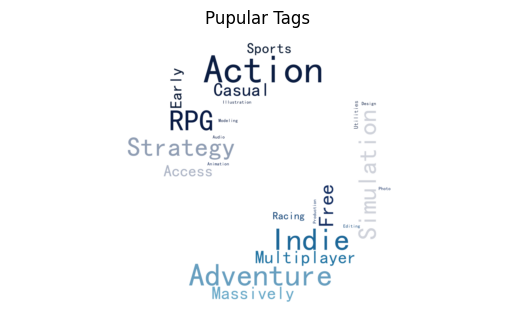

In [5]:
#绘制词云图
path="D:/学习教育/数据可视化/大作业/Popular Tags/"
os.chdir(path)
background_image=Image.open(os.path.join(path,'Steam.png'))
background_array=np.array(background_image)
image_colors=ImageColorGenerator(background_array)
wordcloud=WordCloud(font_path='simhei.ttf',background_color="white",mask=background_array)
wordcloud.generate_from_frequencies(tags_dict)
#将词云图与原始图像合并
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.title("Pupular Tags")
plt.axis('off')
plt.savefig(os.path.join(path,'词云图-Popular Tags.png'),dpi=600)
plt.show()